In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("bigmart_train.csv")
test = pd.read_csv("bigmart_test.csv")

In [3]:
train.shape

(8523, 12)

In [4]:
test.shape

(5681, 11)

In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
train["source"] = "train"
train["source"] = "train"
data = pd.concat([train,test])
data.shape

(14204, 13)

In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                       5681
dtype: int64

In [10]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [12]:
data["Outlet_Age"]= 2018- data['Outlet_Establishment_Year']
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,31


In [13]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [14]:
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [15]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [16]:
data['Outlet_Size'].mode()[0]

'Medium'

In [17]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [18]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

<AxesSubplot:>

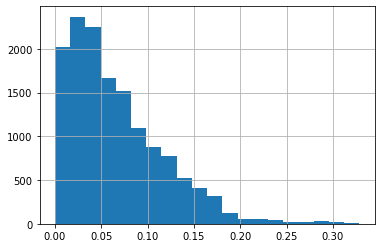

In [19]:
data["Item_Visibility"].hist(bins=20)

In [20]:
Q1 = data["Item_Visibility"].quantile(0.25)
Q3 = data["Item_Visibility"].quantile(0.75)
IQR = Q3-Q1
fill_data = data.query("(@Q1 - 1.5 *@IQR) <= Item_Visibility <= (@Q3 + 1.5 *@IQR)")
fill_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,19
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,20
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,31
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train,9
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train,31
7,FDP10,12.792854,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train,33
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,train,16
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,train,11


In [21]:
data.shape

(14204, 14)

In [22]:
fill_data.shape

(13943, 14)

In [23]:
data['Item_Visibility_data'] = pd.cut(data['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low_viz','viz','high_viz'])

In [24]:
data['Item_Visibility_data'].value_counts()

Low_viz     7363
viz         4283
high_viz    1439
Name: Item_Visibility_data, dtype: int64

In [25]:
data['Item_Visibility_data']= data['Item_Visibility_data'].replace(np.nan, 'Low_viz', regex=True)

In [26]:
data['Item_Fat_Content'] = data["Item_Fat_Content"].replace(['low fat','LF'],'Low Fat')
data['Item_Fat_Content'] = data["Item_Fat_Content"].replace('reg',"Regular")
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [27]:
le = LabelEncoder()

In [28]:
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])
data['Item_Visibility_data']= le.fit_transform(data['Item_Visibility_data'])
data['Outlet_Location_Type']= le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Size']= le.fit_transform(data['Outlet_Size'])


In [29]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [30]:
dummy = pd.get_dummies(data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [31]:
data['Item_Identifier'].value_counts()
data['Items_combine']= data['Item_Identifier'].apply(lambda x: x[0:2])
data['Items_combine']=data['Items_combine'].map({'FD':'Food','NC':'Non_Consumeable','DR':'Drinks'})
data['Items_combine'].unique()

array(['Food', 'Drinks', 'Non_Consumeable'], dtype=object)

In [32]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Visibility_data,Items_combine
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,train,19,0,Food
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,train,9,0,Drinks


In [33]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Size','Items_combine'])


In [34]:
data.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Identifier                 object
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
source                            object
Outlet_Age                         int64
Item_Visibility_data               int32
Item_Fat_Content_0                 uint8
Item_Fat_Content_1                 uint8
Outlet_Location_Type_0             uint8
Outlet_Location_Type_1             uint8
Outlet_Location_Type_2             uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Outlet_Size_0                      uint8
Outlet_Size_1                      uint8
Outlet_Size_2                      uint8
Items_combine_Drinks               uint8
Items_combine_Fo

In [35]:
import warnings
warnings.filterwarnings('ignore')
data.drop(['Item_Type','Outlet_Establishment_Year'], axis=1,inplace=True)

train = data.loc[data['source']== 'train']
test = data.loc[data['source']== 'test']

test.drop(['Item_Outlet_Sales','source'], axis=1,inplace=True)
train.drop(['source'], axis=1,inplace=True)

In [36]:
train.to_csv("train_modify.csv", index = False)
test.to_csv("test_modify.csv", index = False)

In [37]:
train1 = pd.read_csv('train_modify.csv')
test = pd.read_csv('test_modify.csv')